# **Bart Project**

<img src="images/bart-map.png">

## Data Analytics Questions

- **Which BART station is the busiest?**
- **What is the least popular BART route?**
- **When is the best time to go to SF from Berkeley if you want to find a seat?**
- **Which day of the week is the busiest?**
- **How many people take the BART late at night?**

---

## Data Science Questions

### Question A: 
**Compute the straight line distance between every station.**

### Question B: 
**Build a model that can predict the number of people commuting to work by BART between any 2 stations:**

- How would you approach that?
- What additional data would you need?
- How would you want the city or BART officials to use your data?

---

## Data Preparation

1. **Append the two ridership files for 2016 and 2017.**
2. **Merge the station data file.**
3. **Answer the data analytics questions.**


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', 100)

## Importing Data

In [71]:
df2016 = pd.read_csv('data/date-hour-soo-dest-2016.csv')
df2017 = pd.read_csv('data/date-hour-soo-dest-2017.csv')
station = pd.read_csv('data/station_info.csv')

In [72]:
df2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [73]:
df2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [85]:
station.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


In [75]:
# concat 2016 and 2017 data
df = pd.concat([df2016, df2017])

In [76]:
df.shape

(13285207, 4)

In [77]:
df['Origin'].nunique() 

46

In [78]:
station.nunique()

Abbreviation    46
Description     46
Location        46
Name            46
dtype: int64

In [80]:
station['Abbreviation'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK'], dtype=object)

In [81]:
df['Origin'].unique()   

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object)

In [79]:
df[df['Origin'] == 'WSPR']

,Origin,Destination,Throughput,DateTime
4794211,WSPR,LAKE,1,2016-06-23 20:00:00
6115834,WSPR,WSPR,1,2016-08-11 12:00:00
6118795,WSPR,LAKE,1,2016-08-11 14:00:00
6273145,WSPR,WSPR,1,2016-08-17 11:00:00
6301054,WSPR,WSPR,1,2016-08-18 10:00:00
...,...,...,...,...
3313620,WSPR,MONT,1,2017-05-03 23:00:00
3313621,WSPR,NBRK,1,2017-05-03 23:00:00
3313622,WSPR,NCON,1,2017-05-03 23:00:00
3313623,WSPR,SANL,2,2017-05-03 23:00:00


In [82]:
df['Origin'] = df['Origin'].replace('WSPR', 'WARM')

In [86]:
df.sample(5)

,Origin,Destination,Throughput,DateTime
2580534,FTVL,PITT,5,2017-04-07 08:00:00
8982285,LAFY,24TH,1,2016-11-24 14:00:00
5099343,EMBR,ROCK,20,2016-07-05 13:00:00
7330774,GLEN,RICH,3,2016-09-25 14:00:00
2218211,NBRK,CONC,1,2017-03-24 23:00:00


In [84]:
df.columns

Index(['Origin', 'Destination', 'Throughput', 'DateTime'], dtype='object')

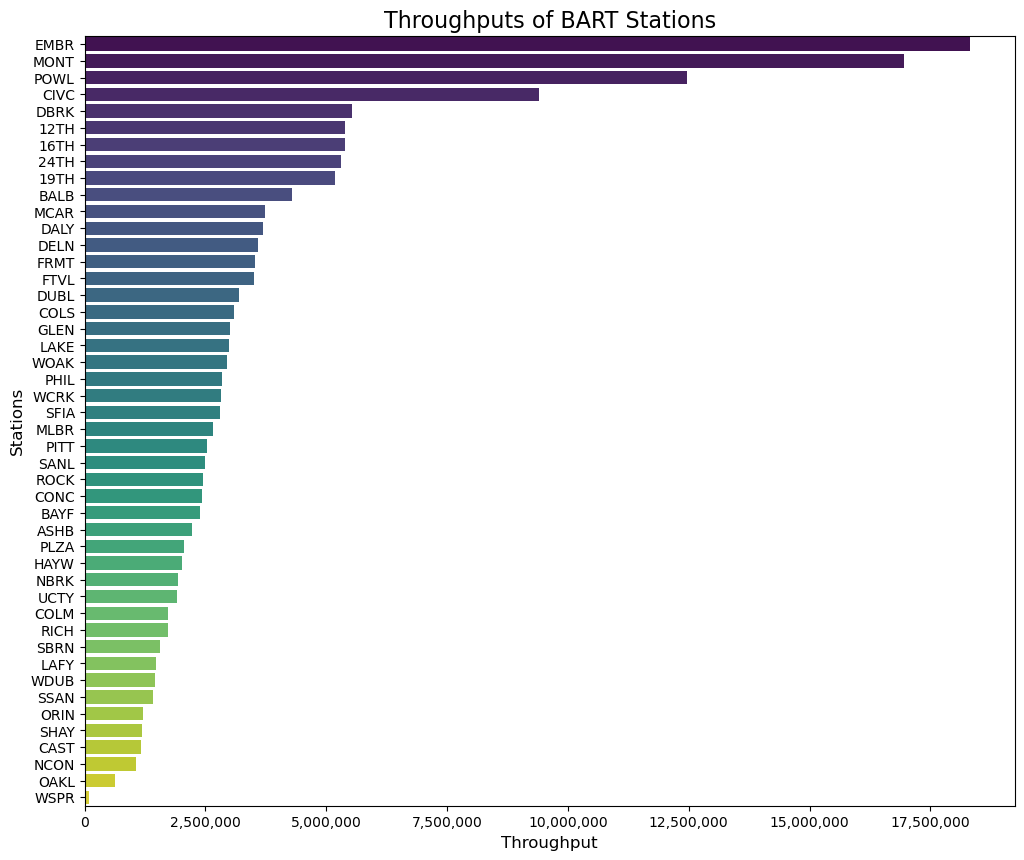

In [108]:
station_throughput = df.groupby('Destination')['Throughput'].sum().reset_index()
station_throughput = station_throughput.sort_values(by='Throughput', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Throughput', y='Destination', data=station_throughput, palette='viridis') 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # I got this code from GPT
plt.title('Throughputs of BART Stations', fontsize=16)
plt.xlabel('Throughput', fontsize=12)
plt.ylabel('Stations', fontsize=12);


In [115]:
most_busy_station = df.groupby('Destination')['Throughput'].sum().idxmax()
most_busy_value = df.groupby('Destination')['Throughput'].sum().max()

print(f"Busiest station: {most_busy_station}, Throughput: {most_busy_value}")

Busiest station: EMBR, Throughput: 18327187


In [116]:
least_busy_station = df.groupby('Destination')['Throughput'].sum().idxmin()
least_busy_value = df.groupby('Destination')['Throughput'].sum().min()

print(f"Least busy station: {least_busy_station}, Throughput: {least_busy_value}")

Least busy station: WSPR, Throughput: 82112
